# Observed generalized Taylor law 
**in the protein coding gene length distributions for the different species**

## Import python modules

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../gl_lib/')
import gl_constants as gl_c
import gl_plot as gl_p

## The protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the gene length's distributions

#### Statistical description 

In [2]:
# statistics on length distributions 
stat_file = gl_c.STAT_G_FILE
if 0:
    print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", \
        stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_both_dbs", "species", "count", "mean", "var"]]

stat_df["2nd_order_momentum"] = stat_df["var"] +  stat_df["mean"]**2 
# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["division_both_dbs"].value_counts())

,division_both_dbs,species,count,mean,var,2nd_order_momentum
14378,bacteria,mycobacteroides_salmoniphilum_gca_004367255,4953,947.621442,592595.141196,1.490582e+06
11980,bacteria,acidihalobacter_prosperus_gca_000754095,3216,928.540112,412256.696991,1.274443e+06


(33627, 6)
division_both_dbs
bacteria         30714
archaea           1229
fungi             1014
protists           237
vertebrates        222
invertebrates      115
plants              96
Name: count, dtype: int64


## Scaling law
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

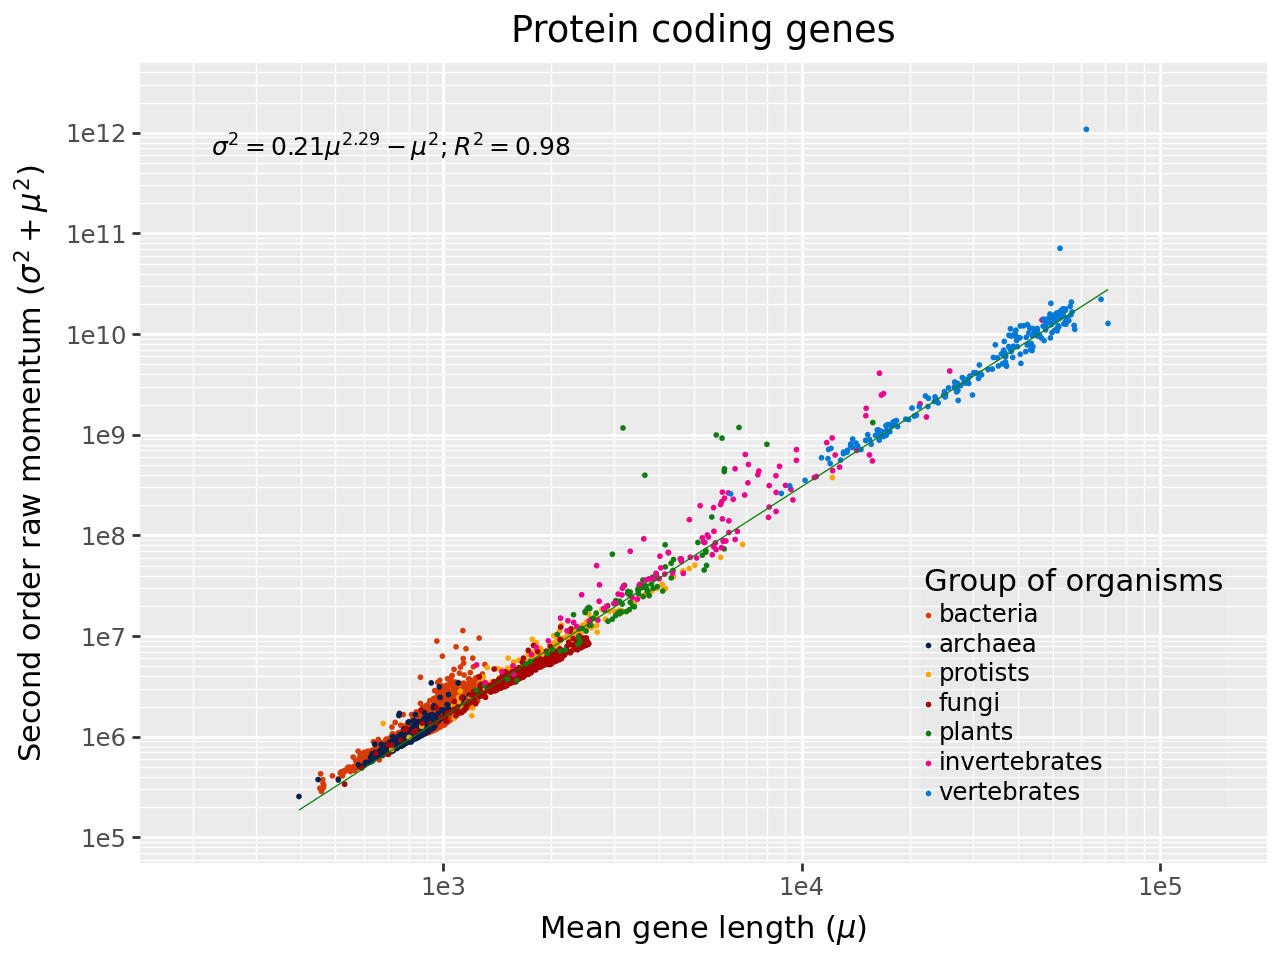

In [3]:
col_x = "mean"  # prots_mean
col_y = "2nd_order_momentum"   # prots_var
legends_by = "division_both_dbs"
legends_label = "Group of organisms"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length ($\mu$)"   
y_lab = "Second order raw momentum ($\sigma^{2} + \mu^{2}$)"
bool_show_regression = True
bool_proteins        = True

df2plot = stat_df
if 0:
    print(df2plot.shape)

# Sort division_both_dbs in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_both_dbs.unique())
df2plot.division_both_dbs = pd.Categorical(df2plot.division_both_dbs, 
                                categories=gl_c.ORG_GROUPS,           
                                ordered=True)
df2plot.sort_values('division_both_dbs', inplace=True)

bool_proteins = False
gl_p.plot_momentum(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, legends_label, \
    bool_show_regression, bool_proteins)

#### Note:  
$y = a . x^{\beta}$   
Because the regression line is:  
$\log(y) = \log(a) + \beta log(x) $